# Topic Modeling

**Topic Modeling** aims at identifiying core topics (sets of words) from a literature corpus. 

## Data Preprocessing

Please put all documents you want to use in the `dokumente` folder.

Supported file types are pdf, txt and docx

In [ ]:
# loading all documents and storing them as string in the list documents

import os
from PyPDF2 import PdfReader
from docx import Document

documents = []
folder_path = "dokumente"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Handle .txt files
    if filename.endswith(".txt"):
        try:
            with open(file_path, "r", encoding="utf-8") as file:
                documents.append(file.read())
        except UnicodeDecodeError:
            try:
                with open(file_path, "r", encoding="windows-1252") as file:
                    documents.append(file.read())
            except Exception as e:
                print(f"Error reading text file {filename}: {str(e)}") 

    # Handle .pdf files
    elif filename.endswith(".pdf"):
        try:
            pdf_reader = PdfReader(file_path)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text() or ""  # Handle None case
            documents.append(text)
        except Exception as e:
            print(f"Error processing PDF {filename}: {str(e)}, skipping this document!")
            continue

    # Handle .docx files
    elif filename.endswith(".docx"):
        doc = Document(file_path)
        text = ""
        for para in doc.paragraphs:
            text += para.text + "\n"
        documents.append(text)

Error processing PDF mckibbon2006.pdf: Odd-length string, skipping this document!


In [7]:
import random
# Showing a sample of the documents

# Customizable parameters
num_samples = 10  # Number of samples to show
char_limit = 300  # Number of characters to display per sample

total_docs = len(documents)
samples_to_show = min(num_samples, total_docs)
random_indices = random.sample(range(total_docs), samples_to_show)

print(f"Showing {samples_to_show} random samples from {total_docs} documents.")
print(
    f"Only the first {char_limit} characters of each sample are displayed.\n"
)

for idx in random_indices:
    sample_text = documents[idx][:char_limit]
    print(f"Sample {idx + 1}:")
    print(sample_text)
    print("-" * 50)

Showing 10 random samples from 42 documents.
Only the first 300 characters of each sample are displayed.

Sample 19:
Communications of the Association for Information Systems Communications of the Association for Information Systems 
Volume 47 Paper 
11-9-2020 
Evaluating T opic Modeling Interpr etability Using T opic Labeled Evaluating T opic Modeling Interpr etability Using T opic Labeled 
Gold-standar d Sets Go
--------------------------------------------------
Sample 23:
Vol. 70, No. 5 (Suppl. 3), May 2020S-162 COVID-19: Transforming Global Health
Abstract 
The world has experienced pandemics worse than the 
coronavirus disease (COVID-19) which resulted in great loss of life and economy. However, the global effect of this pandemic has been devastating. Billions of p
--------------------------------------------------
Sample 8:
BERTopic: Neural topic modeling with a class-based TF-IDF procedure
Maarten Grootendorst
maartengrootendorst@gmail.com
Abstract
Topic models can be useful too

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
from collections import Counter

# Settable parameters
language = "english"  # Language for stopword removal and stemming
max_length = 3  # Maximum n-gram length for compound word detection
min_freq = 50  # Minimum frequency for an n-gram to be a compound word, !!INCREASE THIS THE LARGER YOUR DATASET GETS
additional_stopwords = ["lorem", "ipsum"]  # Add extra stopwords, i.e. words that have no direct meaning and should be excluded form the topic modeling like and, or, but etc. A good set of stopwords are automatically detected by a dictionary, but it is not complete

# Download stopwords if not already present
nltk.download("stopwords")

# Set up stopwords and stemmer
stop_words = set(stopwords.words(language.lower()))
stop_words.update(additional_stopwords)
stemmer = SnowballStemmer(language.lower())

preprocessed_documents = []
all_words = []

# Step 1: Normalize, remove stopwords, and stem all documents
for doc in documents:
    # Normalize: lowercase and remove punctuation
    doc = doc.lower()
    doc = re.sub(r"[^\w\s]", "", doc)
    # Split into words and remove stopwords
    words = doc.split()
    words = [word for word in words if word not in stop_words]
    # Stem the remaining words
    words = [stemmer.stem(word) for word in words]
    # Store for later
    all_words.extend(words)
    preprocessed_documents.append(words)

# Step 2: Find frequent n-grams (compound words) across all words
compound_words_dict = {}
for n in range(2, max_length + 1):
    # Generate n-grams from all words
    ngrams = [
        tuple(all_words[i : i + n]) for i in range(len(all_words) - n + 1)
    ]
    # Count frequencies
    freq = Counter(ngrams)
    # Keep n-grams that appear at least min_freq times
    for gram, count in freq.items():
        if count >= min_freq:
            compound_words_dict[gram] = "_".join(gram)

# Step 3: Replace frequent n-grams in each document
final_preprocessed_documents = []
for words in preprocessed_documents:
    i = 0
    compound_words = []
    while i < len(words):
        replaced = False
        # Check longest n-grams first (e.g., 3-grams before 2-grams)
        for n in range(max_length, 1, -1):
            if i + n <= len(words):
                gram = tuple(words[i : i + n])
                if gram in compound_words_dict:
                    compound_words.append(compound_words_dict[gram])
                    i += n  # Skip ahead by n words
                    replaced = True
                    break
        # If no n-gram match, keep the word as is
        if not replaced:
            compound_words.append(words[i])
            i += 1
    final_preprocessed_documents.append(compound_words)

# Example output: Print the first preprocessed document
print(final_preprocessed_documents[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['research', 'care', 'patent', '2whi', 'search', 'patent', 'literatur', 'start', 'rdproject', 'effect', 'studi', 'state', 'art', 'use', 'advis', 'focus', 'book', 'scienti', 'ﬁ', 'c', 'journal', 'also', 'take', 'patent', 'inform', 'account', 'patent', 'system', 'proli', 'ﬁ', 'c', 'upto', 'date', 'sourc', 'inform', 'appli', 'technolog', 'patent', 'contain', 'detail', 'technic', 'inform', 'often', 'cannot', 'found', 'anywher', 'els', '80', 'current', 'technic', 'knowledg', 'found', 'patent', 'document', 'moreov', 'inform', 'rapid', 'avail', 'patent', 'applic', 'publish', '18', 'month', 'ﬁ', 'rst', 'ﬁ', 'ling', 'irrespect', 'countri', 'origin', 'search', 'patent', 'literatur', 'conduct', 'anyon', 'use', 'freeofcharg', 'espcenet', 'patent', 'data', 'base', 'internet', 'provid', 'access', '60', 'million', 'patent', 'document', 'world', 'document', 'classi', 'ﬁ', 'ed', 'technolog', 'area', 'basi', 'intern', 'patent', 'classi', 'ﬁ', 'cation', 'worldwid', 'standard', '3there', 'good', 'reason',

## Topic Modeling with Gensim

Seems to be broken, no convergence

import gensim
from gensim import corpora
import matplotlib.pyplot as plt

# Hyperparameters
num_topics = 10  # Number of topics to extract
passes = 200  # Number of passes through the corpus
iterations = 50  # Maximum number of iterations per document
eval_every = 1  # Evaluate model every 'eval_every' passes

# Create dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

# Train LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=passes,
    iterations=iterations,
    eval_every=eval_every,
)

# Extract log likelihood per pass
log_likelihoods = []
for pass_num in range(passes):
    perplexity = lda_model.log_perplexity(corpus)
    log_likelihoods.append(perplexity)

# Plot log likelihood per word
plt.figure(figsize=(10, 6))
plt.plot(range(1, passes + 1), log_likelihoods, marker="o")
plt.xlabel("Pass Number")
plt.ylabel("Log Likelihood per Word")
plt.title("LDA Model Convergence")
plt.grid(True)
plt.show()

# Interpretation string
interpretation = """
The plot shows the log likelihood per word over each pass of the LDA training process.
- If the log likelihood increases and then stabilizes, it indicates that the model is converging.
- A higher log likelihood suggests better model fit to the data.
- If the log likelihood continues to increase without stabilizing, more passes may be needed.
- If the log likelihood decreases, it could indicate overfitting or issues with the model setup.
"""
print(interpretation)

# Store the model
model = lda_model

# Topic Modeling with Tomotopy

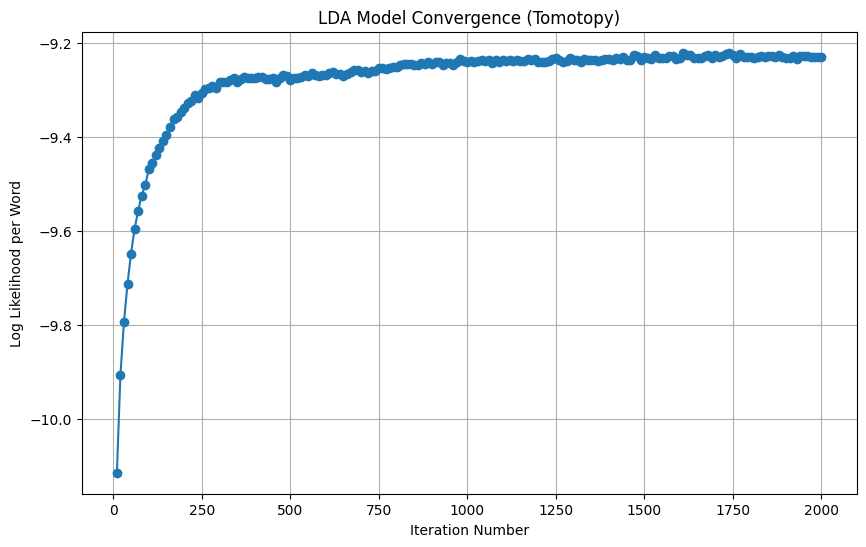


The plot shows the log likelihood per word over the training iterations of the LDA model.
- If the log likelihood increases and then stabilizes, it indicates that the model is converging.
- A higher log likelihood suggests better model fit to the data.
- If the log likelihood continues to increase without stabilizing, more iterations may be needed.
- If the log likelihood decreases, it could indicate overfitting or issues with the model setup.



In [17]:
import tomotopy as tp
import matplotlib.pyplot as plt

# Hyperparameters
num_topics = 10  # Number of topics to extract
iterations = 2000  # Total number of iterations
tw = tp.TermWeight.IDF  # Term weighting scheme (IDF is common for LDA)
alpha = 0.1  # Dirichlet prior for topic distribution
beta = 0.01  # Dirichlet prior for word distribution

# Initialize the LDA model
lda_model = tp.LDAModel(tw=tw, k=num_topics, alpha=alpha, eta=beta)

# Add documents to the model
for doc in preprocessed_documents:
    lda_model.add_doc(doc)

# Train the model and track log likelihood
log_likelihoods = []
for i in range(0, iterations, 10):  # Train in steps of 10 iterations
    lda_model.train(10)  # Train for 10 iterations at a time
    ll_per_word = lda_model.ll_per_word  # Log likelihood per word
    log_likelihoods.append(ll_per_word)

# Plot log likelihood per word
plt.figure(figsize=(10, 6))
plt.plot(range(10, iterations + 10, 10), log_likelihoods, marker="o")
plt.xlabel("Iteration Number")
plt.ylabel("Log Likelihood per Word")
plt.title("LDA Model Convergence (Tomotopy)")
plt.grid(True)
plt.show()

# Interpretation string
interpretation = """
The plot shows the log likelihood per word over the training iterations of the LDA model.
- If the log likelihood increases and then stabilizes, it indicates that the model is converging.
- A higher log likelihood suggests better model fit to the data.
- If the log likelihood continues to increase without stabilizing, more iterations may be needed.
- If the log likelihood decreases, it could indicate overfitting or issues with the model setup.
"""
print(interpretation)

# Store the model
model = lda_model

## Visualizations

In [18]:
# Just show the topic-words

top_n = 10  # Number of top words to display per topic

# Get the number of topics from the model
num_topics = model.k

# Print header
print("Top Topics and Words:")
print("=" * 50)

# Loop through each topic and print top words
for topic_id in range(num_topics):
    topic_words = model.get_topic_words(topic_id, top_n=top_n)
    print(f"Topic {topic_id + 1}:")
    for word, prob in topic_words:
        print(f"  {word:<20} {prob:.4f}")
    print("-" * 50)

Top Topics and Words:
Topic 1:
  chatcit              0.0077
  goldstandard         0.0063
  llms                 0.0056
  hotel                0.0054
  translat             0.0054
  2023                 0.0051
  gpt4                 0.0050
  generat              0.0043
  gpt                  0.0042
  rater                0.0042
--------------------------------------------------
Topic 2:
  clr                  0.0207
  overload             0.0129
  clrs                 0.0098
  technostress         0.0066
  patient              0.0065
  ict                  0.0061
  employe              0.0057
  arbeitsschutz        0.0043
  arbeitsmedizin       0.0043
  für                  0.0043
--------------------------------------------------
Topic 3:
  code                 0.0145
  icd                  0.0118
  tweet                0.0099
  trump                0.0094
  yd                   0.0094
  codebook             0.0080
  xd                   0.0072
  incontext            0.0067
  coder  

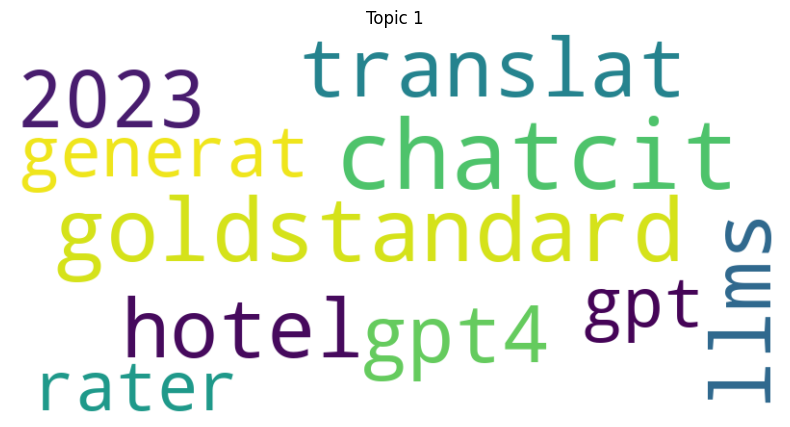

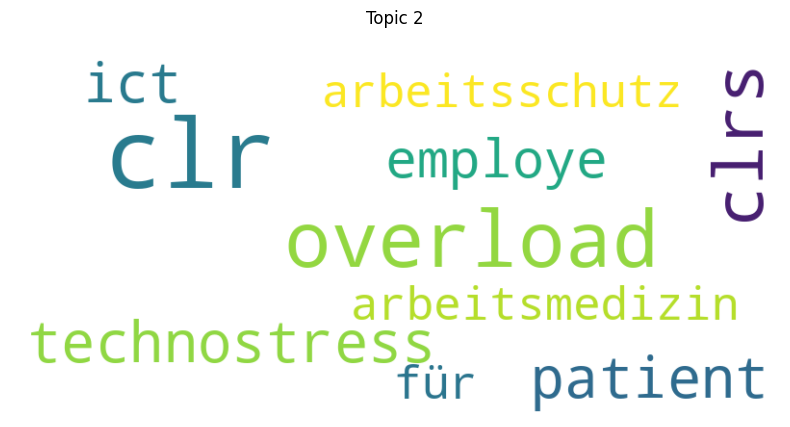

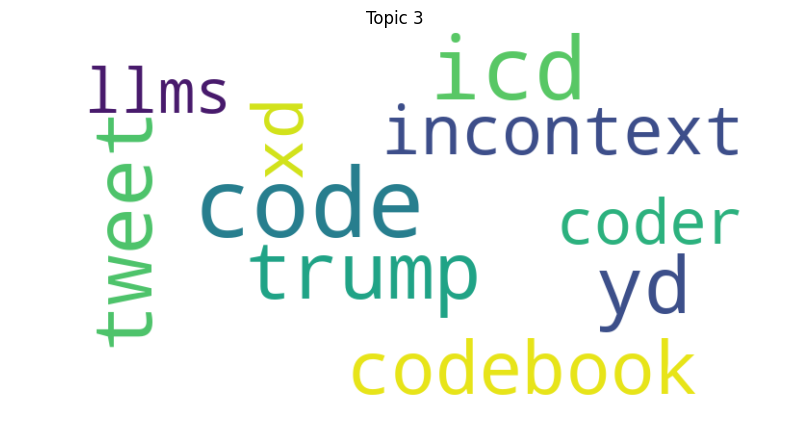

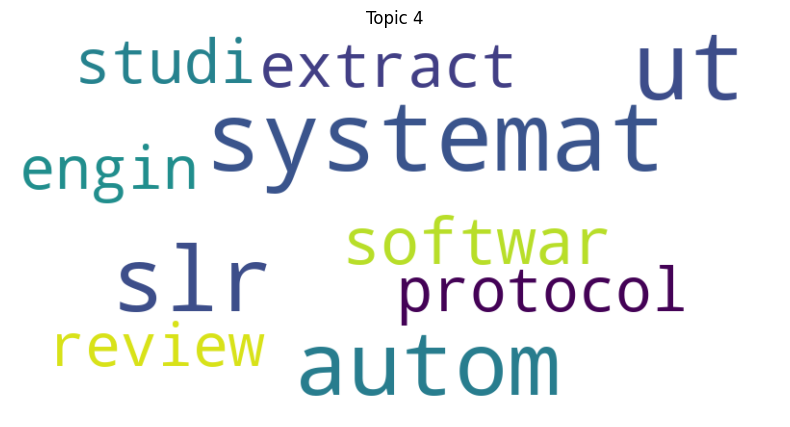

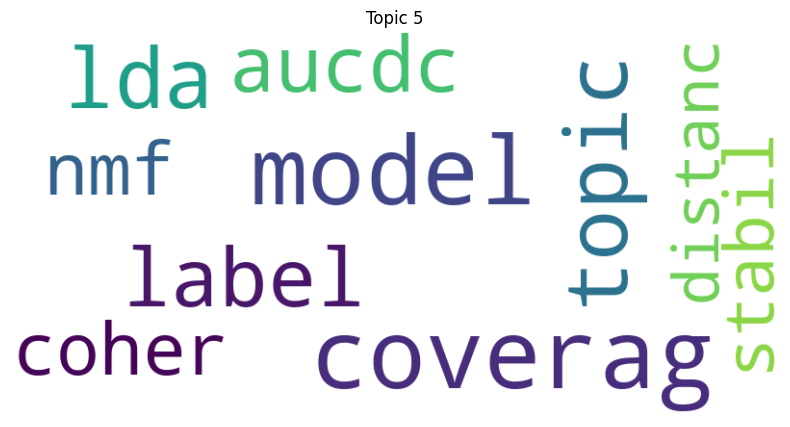

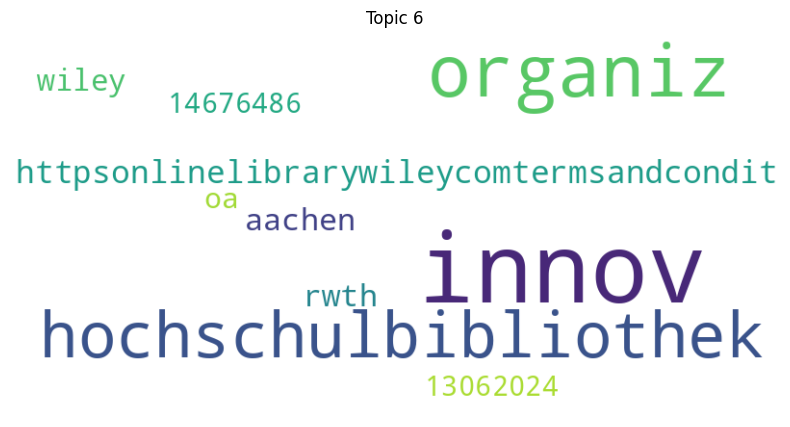

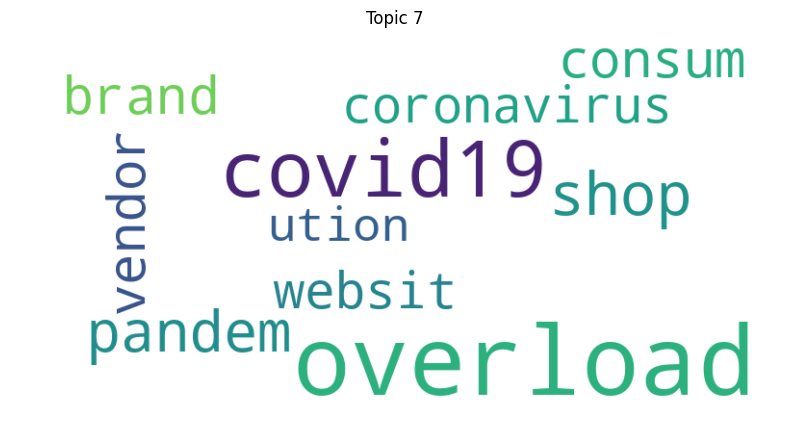

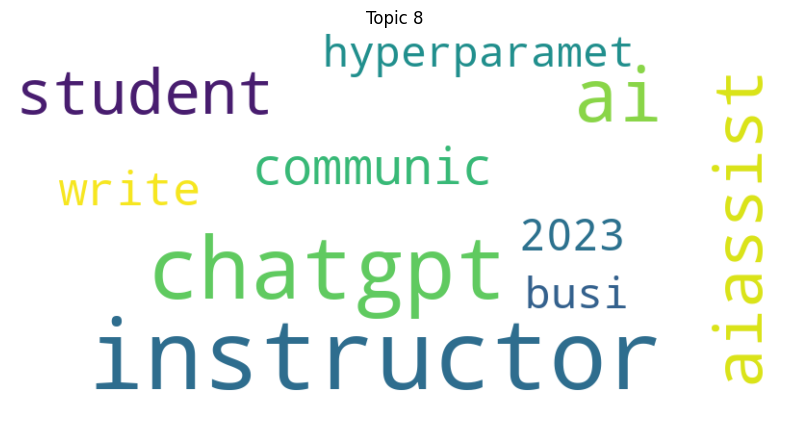

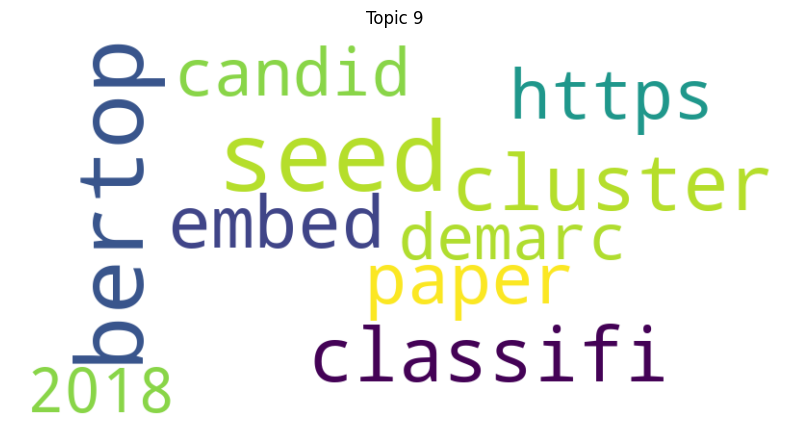

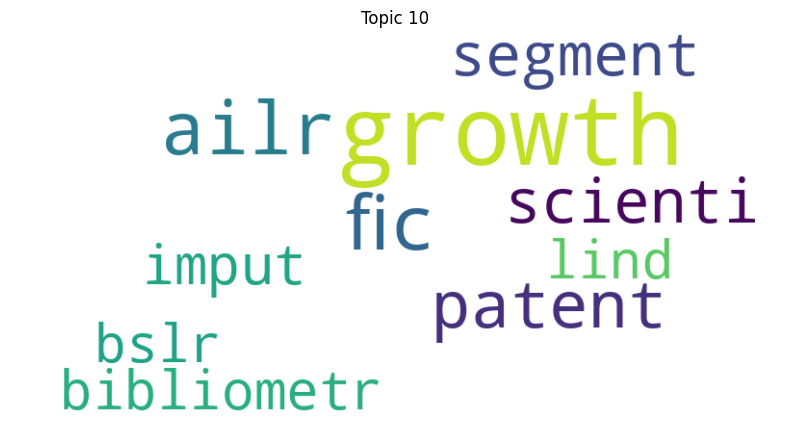

In [20]:
# Wordclouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Hyperparameters
top_n = 10  # Number of top words per topic
width = 800  # Width of the word cloud image
height = 400  # Height of the word cloud image
max_font_size = 100  # Maximum font size for words

# Get the number of topics from the model
num_topics = model.k

# Create and display a word cloud for each topic
for topic_id in range(num_topics):
    topic_words = model.get_topic_words(topic_id, top_n=top_n)
    word_freq = {word: prob for word, prob in topic_words}

    # Generate word cloud
    wordcloud = WordCloud(
        width=width,
        height=height,
        max_font_size=max_font_size,
        background_color="white",
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id + 1}")
    plt.show()